# Bootstrap distances to the future

Estimate uncertainty of distance to the future values per sample and model using the bootstrap of observed distances across time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
n_bootstraps = 10000

In [22]:
color_by_predictor = {
    'naive': '#cccccc',
    'offspring': '#000000',
    'normalized_fitness': '#999999',
    'fitness': '#000000',
    'ep': '#4575b4',
    'ep_wolf': '#4575b4',
    'ep_star': '#4575b4',
    'ep_x': '#4575b4',
    'ep_x_koel': '#4575b4',
    'ep_x_wolf': '#4575b4',
    'oracle_x': '#4575b4',
    'rb': '#4575b4',
    'cTiter': '#91bfdb',
    'cTiter_x': '#91bfdb',
    'cTiterSub': '#91bfdb',
    'cTiterSub_star': '#91bfdb',
    'cTiterSub_x': '#91bfdb',
    'fra_cTiter_x': '#91bfdb',
    'ne_star': '#2ca25f',
    'dms_star': '#99d8c9',
    "dms_nonepitope": "#99d8c9",
    "dms_entropy": "#99d8c9",
    'unnormalized_lbi': '#fc8d59',
    'lbi': '#fc8d59',
    'delta_frequency': '#d73027',
    'lbi-ne_star': "#ffffff",
    'ne_star-lbi': "#ffffff",
    'cTiter_x-ne_star': "#ffffff",
    'cTiter_x-ne_star-lbi': "#ffffff",
    'fra_cTiter_x-ne_star': "#ffffff"
}

name_by_predictor = {
    "naive": "naive",
    "offspring": "observed fitness",
    "normalized_fitness": "true fitness",
    "fitness": "estimated fitness",
    "ep": "epitope mutations",
    "ep_wolf": "Wolf epitope mutations",
    "ep_star": "epitope ancestor",
    "ep_x": "epitope antigenic\nnovelty",
    "ep_x_koel": "Koel epitope antigenic novelty",
    "ep_x_wolf": "Wolf epitope antigenic novelty",
    "oracle_x": "oracle antigenic novelty",
    "rb": "Koel epitope mutations",
    "cTiter": "antigenic advance",
    "cTiter_x": "HI antigenic\nnovelty",
    "cTiterSub": "linear HI mut phenotypes",
    "cTiterSub_star": "ancestral HI mut phenotypes",
    "cTiterSub_x": "HI sub cross-immunity",
    "fra_cTiter_x": "FRA antigenic novelty",
    "ne_star": "mutational load",
    "dms_star": "DMS mutational\neffects",
    "dms_nonepitope": "DMS mutational load",
    "dms_entropy": "DMS entropy",
    "unnormalized_lbi": "unnormalized LBI",
    "lbi": "LBI",
    "delta_frequency": "delta\nfrequency",
    'lbi-ne_star': "mutational load +\n LBI",
    'ne_star-lbi': "mutational load +\n LBI",
    'cTiter_x-ne_star': "mutational load +\nHI antigenic\nnovelty",
    'cTiter_x-ne_star-lbi': "mutational load +\nHI antigenic novelty +\nLBI",
    'fra_cTiter_x-ne_star': "mutational load +\nFRA antigenic novelty"
}

name_by_sample = {
    "simulated_sample_3": "simulated populations",
    "natural_sample_1_with_90_vpm_sliding": "natural populations"
}

In [23]:
color_by_model = {name_by_predictor[predictor]: color for predictor, color in color_by_predictor.items()}

In [5]:
predictors_by_sample = {
    "simulated_sample_3": [
        "naive",
        "normalized_fitness",
        "ep_x",
        "ne_star",
        "lbi",
        "delta_frequency",
        "lbi-ne_star"
    ],
    "natural_sample_1_with_90_vpm_sliding": [
        "naive",
        "ep_x",
        "cTiter_x",
        "ne_star",
        "dms_star",
        "lbi",
        "delta_frequency",
        "cTiter_x-ne_star",
        "ne_star-lbi",
        "cTiter_x-ne_star-lbi"
    ],
    "natural_sample_20191001": ["naive", "cTiter_x-ne_star", "fra_cTiter_x-ne_star", "ne_star-lbi", "cTiter_x-ne_star-lbi"]
}

In [6]:
sns.set_style("ticks")

In [7]:
df = pd.read_table("../results/distance_model_errors.tsv")

## Calculate bootstraps for all models and samples

In [8]:
df["sample"].drop_duplicates()

0                        simulated_sample_3
330    natural_sample_1_with_90_vpm_sliding
767                 natural_sample_20191001
Name: sample, dtype: object

In [9]:
df.columns

Index(['average_distance_to_future', 'average_diversity_in_future',
       'error_type', 'future_timepoint', 'null_validation_error', 'predictors',
       'sample', 'timepoint', 'type', 'validation_error', 'validation_n',
       'validation_timepoint'],
      dtype='object')

In [11]:
mean_distances = []
bootstrap_distances = []
for (sample, error_type, predictors), group_df in df.groupby(["sample", "error_type", "predictors"]):
    if predictors not in predictors_by_sample[sample]:
        continue
        
    print(f"Processing: {sample}, {error_type}, {predictors}")
    bootstrap_distribution = [
        group_df["validation_error"].sample(frac=1.0, replace=True).mean()
        for i in range(n_bootstraps)
    ]
    
    mean_distances.append({
        "sample": sample,
        "error_type": error_type,
        "predictors": predictors,
        "mean_distance": group_df["validation_error"].mean()
    })
    
    bootstrap_distances.append(pd.DataFrame({
        "sample": sample,
        "error_type": error_type,
        "predictors": predictors,
        "bootstrap_distance": bootstrap_distribution
    }))

Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter_x
Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter_x-ne_star
Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter_x-ne_star-lbi
Processing: natural_sample_1_with_90_vpm_sliding, test, delta_frequency
Processing: natural_sample_1_with_90_vpm_sliding, test, dms_star
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_x
Processing: natural_sample_1_with_90_vpm_sliding, test, lbi
Processing: natural_sample_1_with_90_vpm_sliding, test, naive
Processing: natural_sample_1_with_90_vpm_sliding, test, ne_star
Processing: natural_sample_1_with_90_vpm_sliding, test, ne_star-lbi
Processing: natural_sample_1_with_90_vpm_sliding, validation, cTiter_x
Processing: natural_sample_1_with_90_vpm_sliding, validation, cTiter_x-ne_star
Processing: natural_sample_1_with_90_vpm_sliding, validation, cTiter_x-ne_star-lbi
Processing: natural_sample_1_with_90_vpm_sliding, validation, delta_frequency
Processing: natural_sa

In [12]:
mean_distances_df = pd.DataFrame(mean_distances)

In [13]:
mean_distances_df.head()

,sample,error_type,predictors,mean_distance
0,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,6.208217
1,natural_sample_1_with_90_vpm_sliding,test,cTiter_x-ne_star,5.966084
2,natural_sample_1_with_90_vpm_sliding,test,cTiter_x-ne_star-lbi,5.990553
3,natural_sample_1_with_90_vpm_sliding,test,delta_frequency,6.903146
4,natural_sample_1_with_90_vpm_sliding,test,dms_star,7.800288


In [14]:
bootstraps_df = pd.concat(bootstrap_distances)

In [15]:
bootstraps_df["model"] = bootstraps_df["predictors"].map(name_by_predictor)

In [16]:
bootstraps_df.head()

,sample,error_type,predictors,bootstrap_distance,model
0,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,5.856656,HI antigenic\nnovelty
1,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,5.555142,HI antigenic\nnovelty
2,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,5.893095,HI antigenic\nnovelty
3,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,6.986978,HI antigenic\nnovelty
4,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,6.576791,HI antigenic\nnovelty


In [17]:
bootstraps_df.shape

(390000, 5)

In [60]:
def plot_bootstrap_distances(bootstraps_df, predictors, title, observed_means):
    fig, axes = plt.subplots(2, 1, figsize=(16, 8), gridspec_kw={"hspace": 0.5})

    bootstrap_df = bootstraps_df.query("error_type == 'validation'")
    bootstrap_df = bootstrap_df[bootstrap_df["predictors"].isin(predictors)].copy()

    # Use this order for both validation and test facets as in Tables 1 and 2.
    predictors_order = bootstrap_df.groupby("model")["bootstrap_distance"].mean().sort_values().reset_index()["model"].values

    median_naive_distance = bootstrap_df.query("predictors == 'naive'")["bootstrap_distance"].median()
    
    naive_distances = bootstrap_df.query("predictors == 'naive'")["bootstrap_distance"]
    observed_validation_means = observed_means.query("error_type == 'validation'").copy()
    observed_validation_means["p_value"] = observed_validation_means["mean_distance"].apply(
        lambda distance: (distance >= naive_distances).sum() / float(n_bootstraps)
    )
    print(observed_validation_means)
    
    #bootstrap_df["better_than_naive"] = bootstrap_df["bootstrap_distance"] < lower_bound_naive_distance
    #proportion_better = (bootstrap_df.groupby("model")["better_than_naive"].sum() / float(n_bootstraps)).reset_index()
    #print(proportion_better)
    
    validation_ax = axes[0]
    validation_ax = sns.violinplot(
        x="model",
        y="bootstrap_distance",
        data=bootstrap_df,
        order=predictors_order,
        ax=validation_ax,
        palette=color_by_model
    )

    validation_ax.axhline(y=median_naive_distance, label="naive", color="#999999", zorder=-10)
    validation_ax.title.set_text(f"Validation of {name_by_sample[sample]}")

    validation_ax.set_xlabel("Model")
    validation_ax.set_ylabel("Bootstrapped\ndistance to future (AAs)")

    bootstrap_df = bootstraps_df.query("error_type == 'test'")
    bootstrap_df = bootstrap_df[bootstrap_df["predictors"].isin(predictors)].copy()

    median_naive_distance = bootstrap_df.query("predictors == 'naive'")["bootstrap_distance"].median()
    
    naive_distances = bootstrap_df.query("predictors == 'naive'")["bootstrap_distance"]
    observed_test_means = observed_means.query("error_type == 'test'").copy()
    observed_test_means["p_value"] = observed_test_means["mean_distance"].apply(
        lambda distance: (distance >= naive_distances).sum() / float(n_bootstraps)
    )
    print(observed_test_means)

    #bootstrap_df["better_than_naive"] = bootstrap_df["bootstrap_distance"] < lower_bound_naive_distance
    #proportion_better = (bootstrap_df.groupby("model")["better_than_naive"].sum() / float(n_bootstraps)).reset_index()
    #print(proportion_better)

    test_ax = axes[1]
    test_ax = sns.violinplot(
        x="model",
        y="bootstrap_distance",
        data=bootstrap_df,
        order=predictors_order,
        ax=test_ax,
        palette=color_by_model
    )

    test_ax.set_xlabel("Model")
    test_ax.set_ylabel("Bootstrapped\ndistance to future (AAs)")

    test_ax.axhline(y=median_naive_distance, label="naive", color="#999999", zorder=-10)
    test_ax.title.set_text(f"Test of {name_by_sample[sample]}")

    sns.despine()
    
    return fig, axes

                sample  error_type          predictors  mean_distance  p_value
32  simulated_sample_3  validation     delta_frequency       8.128972   0.0001
33  simulated_sample_3  validation                ep_x       9.028264   0.5797
34  simulated_sample_3  validation                 lbi       7.569558   0.0000
35  simulated_sample_3  validation         lbi-ne_star       7.237866   0.0000
36  simulated_sample_3  validation               naive       8.974596   0.4876
37  simulated_sample_3  validation             ne_star       8.267835   0.0011
38  simulated_sample_3  validation  normalized_fitness       6.817056   0.0000
                sample error_type          predictors  mean_distance  p_value
25  simulated_sample_3       test     delta_frequency       8.648416   0.1422
26  simulated_sample_3       test                ep_x       9.070407   0.5149
27  simulated_sample_3       test                 lbi       7.509597   0.0000
28  simulated_sample_3       test         lbi-ne_star   

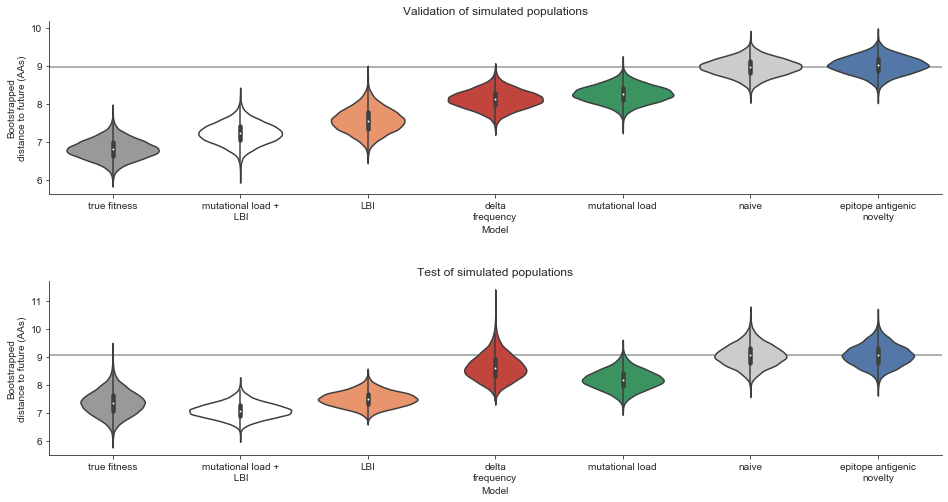

In [61]:
sample = "simulated_sample_3"
fig, axes = plot_bootstrap_distances(
    bootstraps_df.query(f"sample == '{sample}'"),
    predictors_by_sample[sample],
    name_by_sample[sample],
    mean_distances_df.query(f"sample == '{sample}'").copy()
)

                                  sample  error_type            predictors  \
10  natural_sample_1_with_90_vpm_sliding  validation              cTiter_x   
11  natural_sample_1_with_90_vpm_sliding  validation      cTiter_x-ne_star   
12  natural_sample_1_with_90_vpm_sliding  validation  cTiter_x-ne_star-lbi   
13  natural_sample_1_with_90_vpm_sliding  validation       delta_frequency   
14  natural_sample_1_with_90_vpm_sliding  validation              dms_star   
15  natural_sample_1_with_90_vpm_sliding  validation                  ep_x   
16  natural_sample_1_with_90_vpm_sliding  validation                   lbi   
17  natural_sample_1_with_90_vpm_sliding  validation                 naive   
18  natural_sample_1_with_90_vpm_sliding  validation               ne_star   
19  natural_sample_1_with_90_vpm_sliding  validation           ne_star-lbi   

    mean_distance  p_value  
10       6.007192   0.0753  
11       5.823635   0.0169  
12       5.838880   0.0195  
13       6.126241   0.161

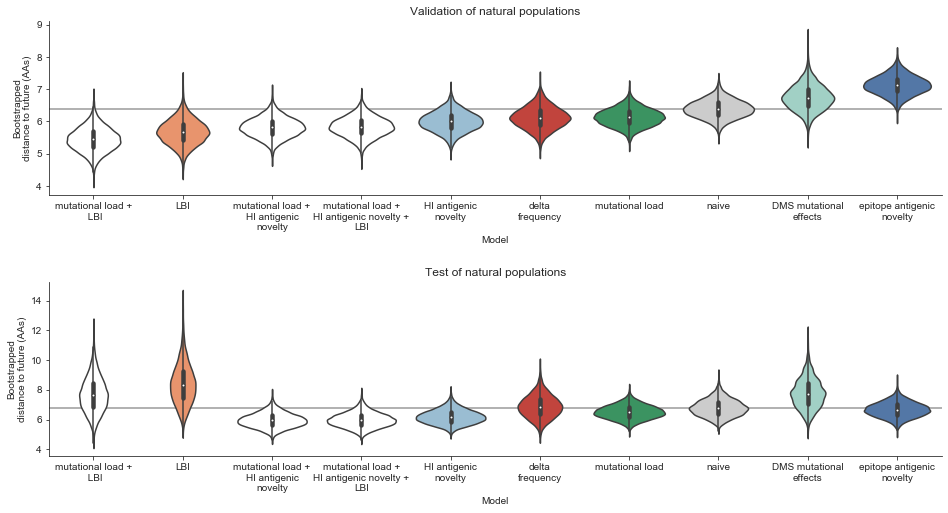

In [62]:
sample = "natural_sample_1_with_90_vpm_sliding"
fig, axes = plot_bootstrap_distances(
    bootstraps_df.query(f"sample == '{sample}'"),
    predictors_by_sample[sample],
    name_by_sample[sample],
    mean_distances_df.query(f"sample == '{sample}'").copy()
)

In [46]:
mean_distances_df.query("predictors == 'naive'").groupby(["sample", "error_type"])["mean_distance"].mean()

sample                                error_type
natural_sample_1_with_90_vpm_sliding  test          6.821066
                                      validation    6.399325
natural_sample_20191001               validation    6.816755
simulated_sample_3                    test          9.071456
                                      validation    8.974596
Name: mean_distance, dtype: float64